<a href="https://colab.research.google.com/github/Cristian2820/Senales-y-sistemas/blob/main/Parciales/Parcial%203/Parcial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Punto 1

Encuentre la funcion de transferencia que caracteriza el sistema masa, resorte, amortiguador, presentado en la siguiente Figura (asuma condiciones iniciales cero):

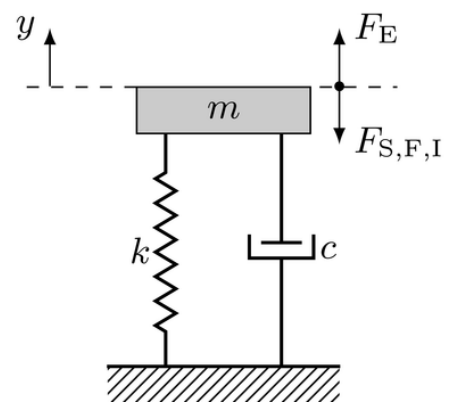

Luego, encuentre el sistema equivalente a partir de un circuito RLC (entrada de tension - salida tensión del capacitor). Finalmente, desde el modelado desarrollado, presente un dashboard que permita simular el sistema como subamortiguado, con amortiguamiento crítico, sobreamortiguado, oscilatorio e inestable. El usuario podra determinar el valor del factor de amortiguamiento y la simulacion deberá determinar los valores de m, k y c y sus equivalentes R, L y C.

Además de estimar el tipo de amortiguamiento. Asimismo,
deberá presentar las gráficas de polos y ceros, diagrama de Bode, respuesta impulso y respuesta al escalon. Nota: Para las gráficas de Bode, respuesta impulso y respuesta al escalón, se sugiere utilizar la API de control de Sympy, a partir de los cuadernos guía: Pendulo elástico y SLIT y fracciones parciales.

##Simulación

El código !pip install sympy --upgrade actualiza la biblioteca Sympy a la última versión disponible. Esto es necesario para asegurarse de que se puedan utilizar todas las funcionalidades más recientes del módulo de control dentro de Sympy, lo que permite realizar análisis y simulaciones de sistemas de control de manera efectiva.

In [1]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2


En este código %matplotlib inline permite que las gráficas de Matplotlib se muestren directamente en un cuaderno Jupyter, facilitando la visualización de los gráficos generados. Luego, se importan las bibliotecas NumPy y Matplotlib para realizar cálculos numéricos y generar gráficos, respectivamente. A continuación, se inicializa Sympy, que es una biblioteca para matemáticas simbólicas, permitiendo realizar cálculos algebraicos y manipular expresiones matemáticas. Se definen las variables simbólicas t, m, c y k como reales y positivas, junto con la variable compleja s, que se utilizará en el análisis de sistemas de control.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
sym.init_printing()
#definiri variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

El código define los coeficientes de un sistema en forma canónica, utilizando las variables simbólicas previamente definidas. Aquí, $a2$ se asigna a la masa $m$, $a1$ al coeficiente de amortiguamiento $c$ y $ao$ a la rigidez $k$. Luego, se calcula la ganancia del sistema $Ko$ como el inverso de $ao$. La frecuencia natural $wn$ se calcula como la raíz cuadrada de $ao/a2$, y el coeficiente de amortiguamiento xi se determina como $a1$ dividido por 2 veces la raíz cuadrada de $ao$ y $a2$.

Finalmente, se construye la función de transferencia $H$ del sistema, que es una expresión que relaciona la entrada y salida del sistema en el dominio de Laplace. La expresión de $H$ se muestra en función de $s$, donde el numerador representa la ganancia del sistema multiplicada por el cuadrado de la frecuencia natural, y el denominador incluye términos relacionados con el amortiguamiento y la frecuencia natural.


In [3]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*sym.sqrt(ao*a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

El código calcula los polos del sistema, que son valores complejos que determinan la estabilidad y el comportamiento del sistema en el dominio de Laplace. Se definen dos polos, $p_1$ y $p_2$, utilizando el coeficiente de amortiguamiento $\xi$ y la frecuencia natural $\omega_n$.

El primer polo $p_1$ se calcula como $$-\xi \cdot \omega_n + j \cdot \omega_n \cdot \sqrt{1 - \xi^2}$$ donde $j$ es la unidad imaginaria. Este término captura la parte real del polo, que está relacionada con el amortiguamiento, y la parte imaginaria, que está relacionada con la frecuencia oscilatoria del sistema. La variable $p_1$ se utiliza para analizar la estabilidad del sistema y su respuesta temporal.


In [4]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                      _____________
                     ╱     2       
                    ╱     c        
        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1 
   c             ╲╱      4⋅k⋅m     
- ─── + ───────────────────────────
  2⋅m               √m             

En este código se define un diccionario llamado $mck$ para reemplazar los valores de las variables $m$ (masa), $c$ (amortiguamiento) y $k$ (rigidez) en las ecuaciones. En este caso, se asignan los siguientes valores:

- $m = 4.0$
- $c = 1.0$
- $k = 1.0$

Este diccionario facilita la evaluación de expresiones simbólicas al sustituir las variables por sus valores numéricos específicos.


In [5]:
#Reemplazando los valores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck

{c: 1.0, k: 1.0, m: 4.0}

En este código se imprime el resultado de las siguientes expresiones al reemplazar los valores definidos en el diccionario $mck$:

- $p1$: El primer polo del sistema.
- $p2$: El segundo polo del sistema.
- $\xi$: El coeficiente de amortiguamiento.
- $\omega_n$: La frecuencia natural del sistema.

Esto permite obtener los valores numéricos correspondientes a los polos y características del sistema de control de segundo orden.


In [6]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.484122918275927*I
p2= -0.125 - 0.484122918275927*I
xi= 0.250000000000000
omega_n= 0.500000000000000


Este código importa el paquete de control de Sympy para graficar los polos y ceros del sistema. A continuación, se define la función de transferencia $H$ utilizando los valores numéricos evaluados de $m$, $c$ y $k$.

Se utiliza `TransferFunction` para crear la función de transferencia $tf1$ y luego se genera el gráfico de polos y ceros con `pole_zero_plot(tf1)`. Esta gráfica es útil para visualizar la estabilidad y el comportamiento dinámico del sistema de control.


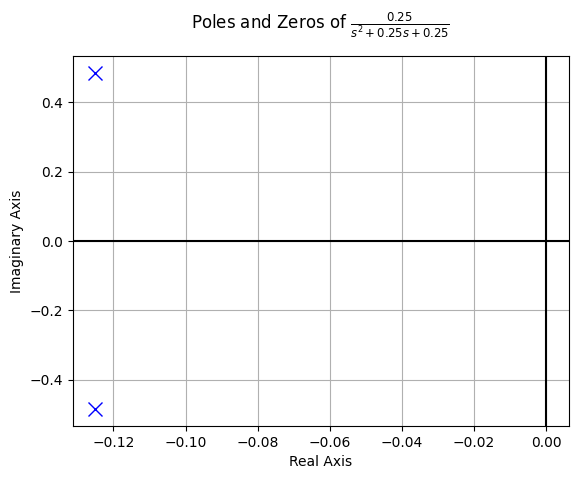

In [7]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

En este código se utiliza `bode_plot(tf1)` para generar el diagrama de Bode de la función de transferencia $tf1$. Este diagrama muestra la respuesta en frecuencia del sistema, representando tanto la magnitud como la fase a lo largo de diferentes frecuencias. El diagrama de Bode es esencial para analizar la estabilidad y el comportamiento en frecuencia de sistemas de control.


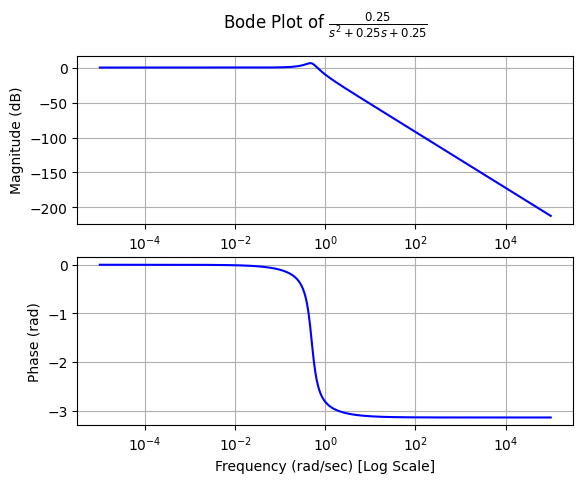

In [8]:
bode_plot(tf1)

En este código se utiliza `impulse_response_plot(tf1, upper_limit=5/(xi.subs(mck)*wn.subs(mck)))` para graficar la respuesta al impulso de la función de transferencia $tf1$. Esta gráfica muestra cómo reacciona el sistema ante una entrada de impulso unitario, y el parámetro `upper_limit` define el límite superior del tiempo para la visualización. La respuesta al impulso es fundamental para entender la dinámica del sistema y su comportamiento temporal.


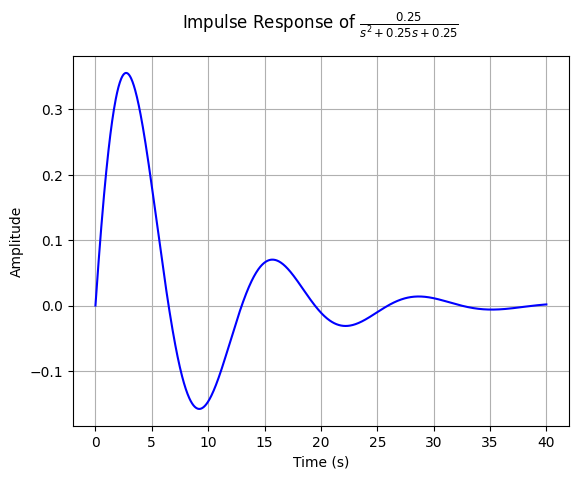

In [9]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

En este código se utiliza `step_response_plot(tf1, upper_limit=5/(xi.subs(mck)*wn.subs(mck)))` para graficar la respuesta al escalón de la función de transferencia \(tf1\). Esta gráfica muestra cómo el sistema responde a una entrada de escalón unitario a lo largo del tiempo. Al igual que en la respuesta al impulso, el parámetro `upper_limit` establece el límite superior del tiempo para la visualización, permitiendo analizar la estabilización y el comportamiento del sistema después de un cambio abrupto en la entrada.


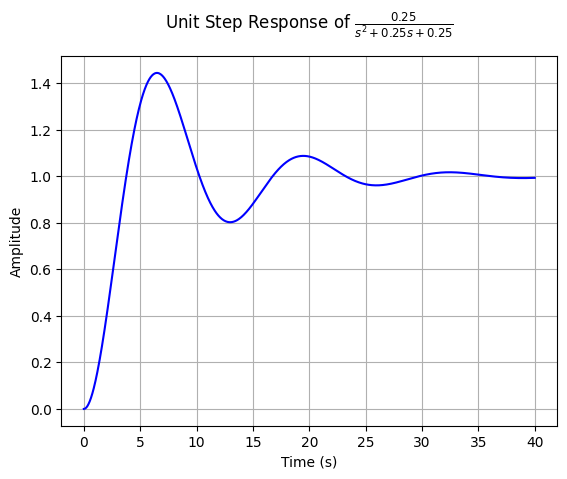

In [10]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))